# Handling Missing Data

Contoh Data (data.csv)

In [ ]:
ID,Name,Age,Salary,Department,Performance_Score,Bonus
1,Alice,25,50000,IT,90,
2,Bob,30,60000,HR,85,
3,Charlie,35,,Finance,80,
4,David,40,75000,,95,
5,Eve,,,IT,88,
6,Frank,28,55000,HR,,
7,Grace,33,,Finance,92,
8,Hank,,70000,IT,,
9,Ivy,29,72000,HR,87,
10,Jack,31,58000,,89,

Example Variable Deletion Method

In [ ]:
# Import Library
import pandas as pd

# Membaca Data
data = pd.read_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/data.csv')

# Untuk menentukan data missing , contoh 20%
threshold = 0.2

# Kalau data yang hilang melebihi threshold (20%) maka akan di hapus
data = data[data.columns[data.isnull().mean() < threshold]]

data.to_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/variable_deletion_cleaned.csv', index=False)

Output :

In [ ]:
ID,Name
1,Alice
2,Bob
3,Charlie
4,David
5,Eve
6,Frank
7,Grace
8,Hank
9,Ivy
10,Jack

Example Imputasi Mean atau Medium Method

In [ ]:
# Import Library
import pandas as pd

# Membaca Data
data = pd.read_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/data.csv')

# Ubah data menjadi ke Numeric
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

data.to_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/mean_or_median_cleaned.csv', index=False)

Output :

In [ ]:
ID,Name,Age,Salary,Department,Performance_Score,Bonus
1,Alice,25.0,50000.0,IT,90.0,
2,Bob,30.0,60000.0,HR,85.0,
3,Charlie,35.0,60000.0,Finance,80.0,
4,David,40.0,75000.0,,95.0,
5,Eve,30.5,60000.0,IT,88.0,
6,Frank,28.0,55000.0,HR,88.5,
7,Grace,33.0,60000.0,Finance,92.0,
8,Hank,30.5,70000.0,IT,88.5,
9,Ivy,29.0,72000.0,HR,87.0,
10,Jack,31.0,58000.0,,89.0,

Example Most Common Value Method

In [ ]:
# Import Library
import pandas as pd

# Membaca Data
data = pd.read_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/data.csv')

# Mengisi nilai yang hilang dengan nilai yang paling sering muncul dalam kolom tertentu
data['Department'] = data['Department'].fillna(data['Department'].value_counts().idxmax())

# Menyimpan hasil ke CSV
data.to_csv('/media/ntfs/KULIAH/Semester 4/Kecerdasan/most_common_value_cleaned.csv', index=False)

Output :

In [ ]:
ID,Name,Age,Salary,Department,Performance_Score,Bonus
1,Alice,25.0,50000.0,IT,90.0,
2,Bob,30.0,60000.0,HR,85.0,
3,Charlie,35.0,,Finance,80.0,
4,David,40.0,75000.0,IT,95.0,
5,Eve,,,IT,88.0,
6,Frank,28.0,55000.0,HR,,
7,Grace,33.0,,Finance,92.0,
8,Hank,,70000.0,IT,,
9,Ivy,29.0,72000.0,HR,87.0,
10,Jack,31.0,58000.0,IT,89.0,

# Handling Continuous Features

Example Min-Max Normalization Method

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Object Array (Umur, Pengalaman, Gaji)
data = np.array([
    [25, 2, 5],
    [30, 5, 10],
    [35, 10, 20],
    [40, 15, 35],
    [45, 20, 50]
])

# Buat objek MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Lakukan scaling pada data
scaled_data = scaler.fit_transform(data)

# Tampilkan hasil dalam DataFrame agar lebih rapi
df_scaled = pd.DataFrame(scaled_data, columns=['Usia (scaled)', 'Pengalaman (scaled)', 'Gaji (scaled)'])
print(df_scaled)

Output :

In [ ]:
   Usia (scaled)  Pengalaman (scaled)  Gaji (scaled)
0           0.00             0.000000       0.000000
1           0.25             0.166667       0.111111
2           0.50             0.444444       0.333333
3           0.75             0.722222       0.666667
4           1.00             1.000000       1.000000

Example Standardization Method

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 sampel/observasi dengan 2 fitur/variabel
data = np.array([[4, 1], [11, 1], [10, 4], [1, 11]])

# Membuat objek scaler
scaler = StandardScaler()

# Melatih dan mentransformasi data
scaled_data = scaler.fit_transform(data)

print(scaled_data)


Output :

In [ ]:
[[-0.60192927 -0.79558708]
 [ 1.08347268 -0.79558708]
 [ 0.84270097 -0.06119901]
 [-1.32424438  1.65237317]]

# Handle Categorical Features

Example Label Encoding Method

In [ ]:
# import packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# intialise data of lists.
data = {'Gender':['male', 'female', 'female', 'male','male'],
        'Country':['Tanzania','Kenya', 'Tanzania', 'Tanzania','Kenya']}

# Create DataFrame
data = pd.DataFrame(data)

# create label encoder object
le = LabelEncoder()

data['Gender']= le.fit_transform(data['Gender'])
data['Country']= le.fit_transform(data['Country'])

print(data)

Output :

In [ ]:
   Gender  Country
0       1        1
1       0        0
2       0        1
3       1        1
4       1        0

Example One-hot-encoding Method

In [ ]:
# import packages
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define example
data = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse_output=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

Output :

In [ ]:
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

# Feature Selection

Example Selective Univariate Method

In [ ]:
# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load iris data
iris_dataset = load_iris()

# Create features and target
X = iris_dataset.data
y = iris_dataset.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Output :

In [ ]:
Original feature number: 4
Reduced feature number: 2

Example Priority Feature Method

In [ ]:
# Load libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Load iris data
iris_dataset = load_iris()

# Create features and target
X = iris_dataset.data
y = iris_dataset.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Output :

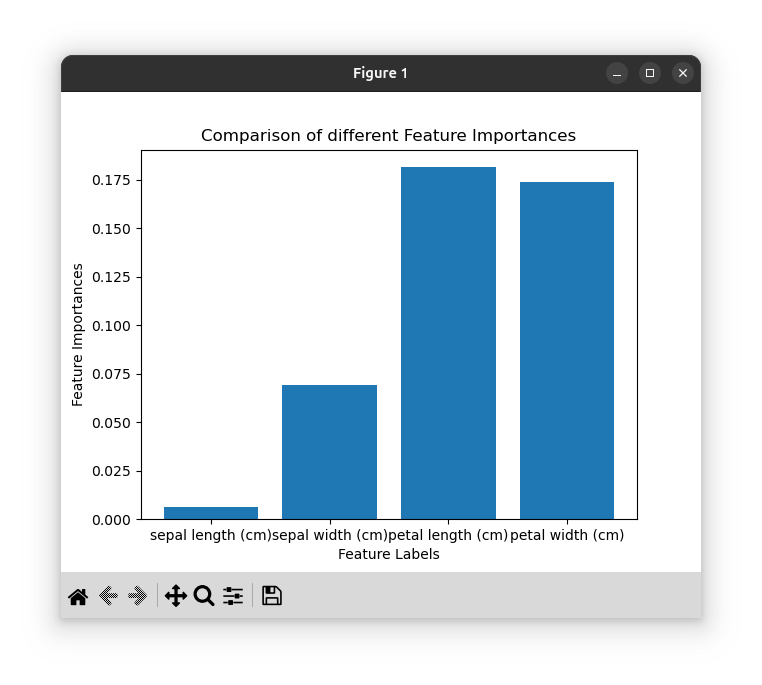

Example Matrix Heatmap Method

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california_dataset = fetch_california_housing()

# Create a DataFrame
california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))  # Mengatur ukuran heatmap
ax = sns.heatmap(california.corr().round(2), annot=True, cmap="coolwarm")

# Show plot
plt.show()

Output :

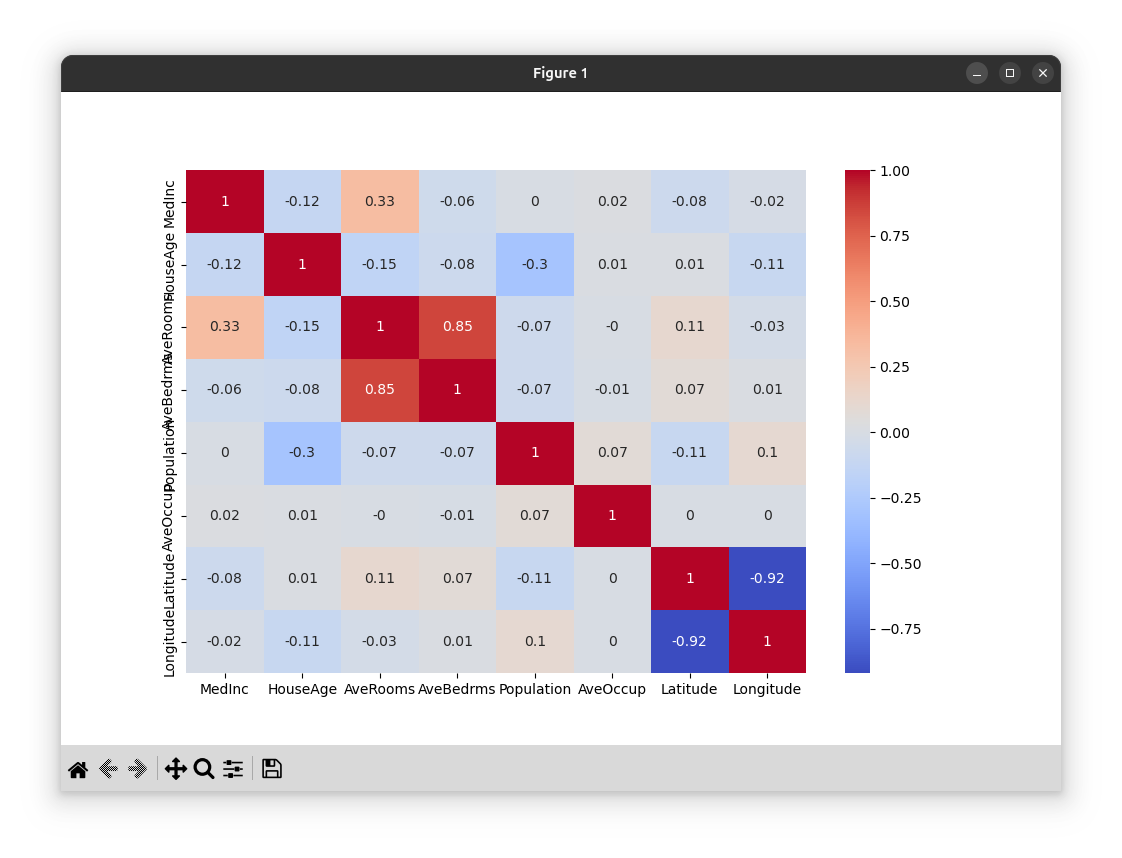